In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("../DATA/charity_data.csv")
application_df.head()
application_df.dtypes

EIN                        int64
NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(['EIN'], axis = 1)
application_df = application_df.drop(['NAME'], axis = 1)
print(application_df.shape)
application_df.head()

(34299, 10)


,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Examine data in column with "suspect" data type (['INCOME_AMT'])
print(application_df['INCOME_AMT'].sort_values(ascending = False))
INCAM_counts = application_df.INCOME_AMT.value_counts()
INCAM_counts

22579    5M-10M
32499    5M-10M
30285    5M-10M
21462    5M-10M
32417    5M-10M
          ...  
13459         0
13458         0
13457         0
13456         0
17149         0
Name: INCOME_AMT, Length: 34299, dtype: object


0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

In [4]:
# Use "string replace" to alter entries in ['INCOME_AMT']
application_df['INCOME_AMT'] = application_df['INCOME_AMT'].replace('1-9999', '5000')
application_df['INCOME_AMT'] = application_df['INCOME_AMT'].replace('100000-499999', '500000')
application_df['INCOME_AMT'] = application_df['INCOME_AMT'].replace('1M-5M', '2500000')
application_df['INCOME_AMT'] = application_df['INCOME_AMT'].replace('5M-10M', '7500000')
application_df['INCOME_AMT'] = application_df['INCOME_AMT'].replace('10M-50M', '30000000')
application_df['INCOME_AMT'] = application_df['INCOME_AMT'].replace('50M+', '50000000')
application_df['INCOME_AMT'] = application_df['INCOME_AMT'].replace('25000-99999', '62500')
application_df['INCOME_AMT'] = application_df['INCOME_AMT'].replace('10000-24999', '17500')
INCAM_counts = application_df.INCOME_AMT.value_counts()
INCAM_counts

0           24388
62500        3747
500000       3374
2500000       955
5000          728
17500         543
30000000      240
7500000       185
50000000      139
Name: INCOME_AMT, dtype: int64

In [5]:
# Change data type in ['INCOME_AMT'] from Object to int64
application_df['INCOME_AMT'] = pd.to_numeric(application_df['INCOME_AMT'])
application_df.dtypes

APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                 int64
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

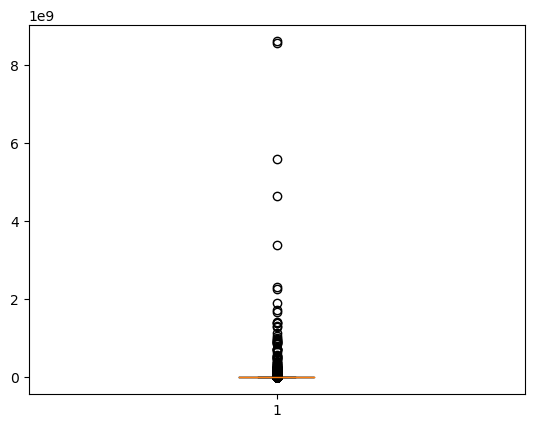

count    3.429900e+04
mean     2.769199e+06
std      8.713045e+07
min      5.000000e+03
25%      5.000000e+03
50%      5.000000e+03
75%      7.742000e+03
max      8.597806e+09
Name: ASK_AMT, dtype: float64

In [6]:
#Examine "suspect" column for potential outliers using a boxplot
# Dependencies
import matplotlib.pyplot as plt

# Example outlier plot of reaction times
fig1, ax1 = plt.subplots()
ax1.boxplot(application_df['ASK_AMT'])
plt.show()

application_df['ASK_AMT'].describe()

In [7]:
# Print column values to determine exact value of outliers
print(application_df['ASK_AMT'].sort_values(ascending  = False))

33175    8597806340
34222    8556638692
33678    5591584994
24795    4653011914
31337    3391919220
            ...    
13293          5000
13292          5000
13291          5000
13290          5000
17149          5000
Name: ASK_AMT, Length: 34299, dtype: int64


In [8]:
# Keep the rows where 'Ask Amount' values are less than the outlier amounts
application_df = application_df.loc[application_df['ASK_AMT'] < 8000000000]
print(application_df.shape)
application_df.head()

(34297, 10)


,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,5000,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,17500,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,500000,N,142590,1


In [9]:
# Look at APPLICATION_TYPE value counts for binning
AppType_counts = application_df.APPLICATION_TYPE.value_counts()
AppType_counts

T3     27035
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [10]:
# Determine which values to replace if counts are less than ...?
replace_application = list(AppType_counts[AppType_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27035
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [11]:
# Look at CLASSIFICATION value counts for binning
CLASS_counts = application_df.CLASSIFICATION.value_counts()
CLASS_counts

C1000    17325
C2000     6073
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [12]:
# Determine which values to replace if counts are less than ..?
replace_class = list(CLASS_counts[CLASS_counts < 1800].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17325
C2000     6073
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [13]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
print(application_cat)

['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE', 'ORGANIZATION', 'SPECIAL_CONSIDERATIONS']


In [14]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

C:\Users\rsean\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [15]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

C:\Users\rsean\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,STATUS,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,...,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,0,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,5000,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1,0,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1,17500,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1,500000,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [16]:
# Save cleaned. 'hot-encoded' data for possible export to COLAB
#application_df.to_csv('../DATA/application_df_clean2.csv', index = False, encoding='UTF8')

In [17]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values


# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

C:\Users\rsean\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [29]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 72
hidden_nodes_layer2 = 36
hidden_nodes_layer3 = 62
hidden_nodes_layer4 = 76
hidden_nodes_layer5 = 54

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Fifth hidden layer
#nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 72)                2592      
                                                                 
 dense_11 (Dense)            (None, 36)                2628      
                                                                 
 dense_12 (Dense)            (None, 62)                2294      
                                                                 
 dense_13 (Dense)            (None, 76)                4788      
                                                                 
 dense_14 (Dense)            (None, 1)                 77        
                                                                 
Total params: 12,379
Trainable params: 12,379
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period = 5
)

In [31]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=200,callbacks=[cp_callback])

Epoch 1/200
804/804 [==============================] - 2s 1ms/step - loss: 0.5756 - accuracy: 0.7186
Epoch 2/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5636 - accuracy: 0.7252
Epoch 3/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5609 - accuracy: 0.7280
Epoch 4/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5591 - accuracy: 0.7283
Epoch 5/200
775/804 [===========================>..] - ETA: 0s - loss: 0.5585 - accuracy: 0.7287
Epoch 5: saving model to checkpoints\weights.05.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5583 - accuracy: 0.7289
Epoch 6/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5568 - accuracy: 0.7301
Epoch 7/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5562 - accuracy: 0.7311
Epoch 8/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5560 - accuracy: 0.7309
Epoch 9/200
804/804 [==============================] -

782/804 [============================>.] - ETA: 0s - loss: 0.5479 - accuracy: 0.7329
Epoch 65: saving model to checkpoints\weights.65.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5470 - accuracy: 0.7336
Epoch 66/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5468 - accuracy: 0.7340
Epoch 67/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5469 - accuracy: 0.7344
Epoch 68/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5469 - accuracy: 0.7349
Epoch 69/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5470 - accuracy: 0.7353
Epoch 70/200
774/804 [===========================>..] - ETA: 0s - loss: 0.5471 - accuracy: 0.7349
Epoch 70: saving model to checkpoints\weights.70.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5471 - accuracy: 0.7345
Epoch 71/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5471 - accuracy: 0.7338
Epoch 72/200
804/804 

804/804 [==============================] - 1s 2ms/step - loss: 0.5446 - accuracy: 0.7353
Epoch 128/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5453 - accuracy: 0.7353
Epoch 129/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5454 - accuracy: 0.7352
Epoch 130/200
776/804 [===========================>..] - ETA: 0s - loss: 0.5440 - accuracy: 0.7348
Epoch 130: saving model to checkpoints\weights.130.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5446 - accuracy: 0.7345
Epoch 131/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5439 - accuracy: 0.7352
Epoch 132/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5445 - accuracy: 0.7358
Epoch 133/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5442 - accuracy: 0.7356
Epoch 134/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5446 - accuracy: 0.7349
Epoch 135/200
776/804 [==========================

800/804 [============================>.] - ETA: 0s - loss: 0.5427 - accuracy: 0.7363
Epoch 190: saving model to checkpoints\weights.190.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5427 - accuracy: 0.7364
Epoch 191/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5423 - accuracy: 0.7371
Epoch 192/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5424 - accuracy: 0.7361
Epoch 193/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5424 - accuracy: 0.7359
Epoch 194/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5477 - accuracy: 0.7364
Epoch 195/200
799/804 [============================>.] - ETA: 0s - loss: 0.5432 - accuracy: 0.7364
Epoch 195: saving model to checkpoints\weights.195.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5437 - accuracy: 0.7360
Epoch 196/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5426 - accuracy: 0.7360
Epoch 197/2

In [33]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5826 - accuracy: 0.7254 - 278ms/epoch - 1ms/step
Loss: 0.5825698375701904, Accuracy: 0.7254490256309509


In [34]:
# Export our model to HDF5 file
nn.save("../CODING/AlphabetSoupCharity_OPTIMIZE3.h5")

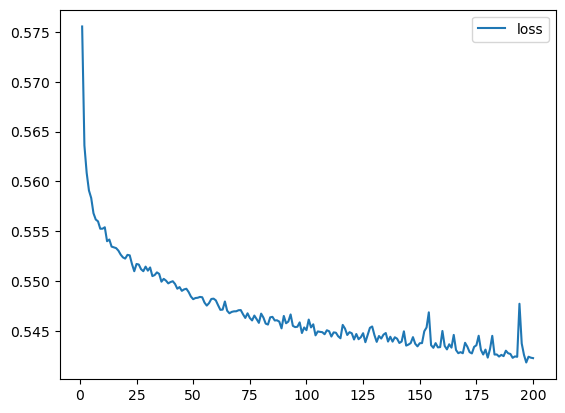

In [35]:
history_df = pd.DataFrame(fit_model.history)
history_df.index += 1
history_df.plot(y="loss").get_figure().savefig('../IMAGES/Figure7')

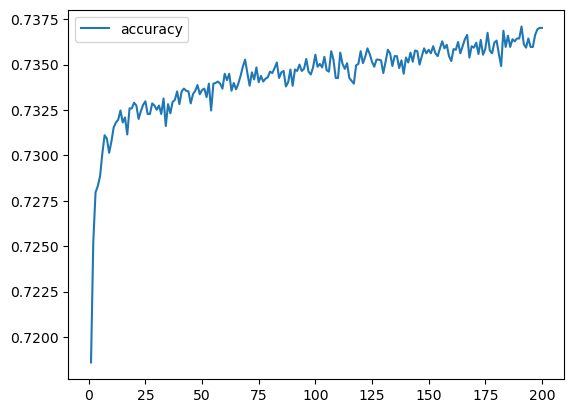

In [36]:
history_df.plot(y="accuracy").get_figure().savefig('../IMAGES/Figure8')